In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('research.csv')
data.head()


,INDEX,Date,MAX,MIN,AW,RF,SSH
0,42971,01/01/1975,28.0,15.4,7.0,0.0,7.6
1,42971,02/01/1975,28.0,15.8,5.0,0.0,6.8
2,42971,03/01/1975,28.5,15.0,9.0,0.0,5.7
3,42971,04/01/1975,27.6,18.5,12.0,0.0,7.1
4,42971,05/01/1975,26.4,15.6,13.0,0.0,10.2


In [4]:
data.drop(["AW" , 'RF' , 'SSH','INDEX'] , axis=1, inplace=True)

In [79]:
# data.set_index("Date" , inplace=True)   


In [5]:
data.head()


,Date,MAX,MIN
0,01/01/1975,28.0,15.4
1,02/01/1975,28.0,15.8
2,03/01/1975,28.5,15.0
3,04/01/1975,27.6,18.5
4,05/01/1975,26.4,15.6


<Axes: >

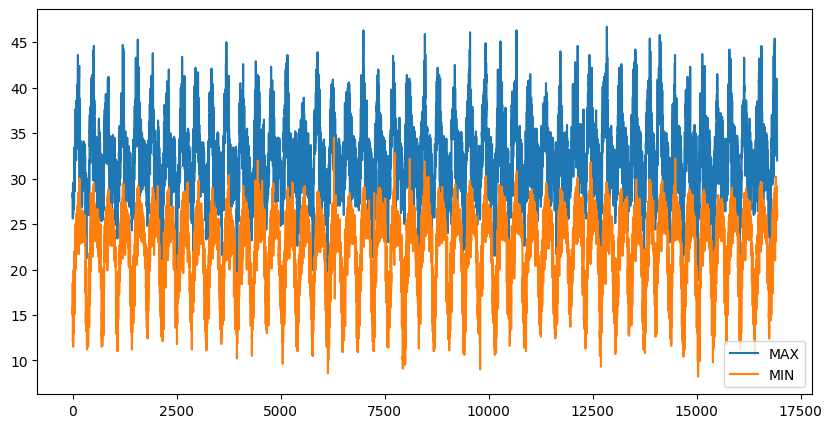

In [6]:
data.plot(figsize=(10, 5))

In [7]:
null_indices = data[data.isnull().any(axis=1)].index.tolist()


In [8]:
print (null_indices)

[157, 678, 705, 872, 1086, 1813, 2105, 2204, 2315, 2549, 2597, 2619, 2650, 2661, 2670, 3534, 3947, 4340, 4473, 4474, 5071, 5072, 5109, 5138, 5144, 5148, 5176, 5293, 5387, 6103, 6723, 7590, 9072, 9173, 9389, 11660, 12230, 12322, 15449, 16025, 16624]


In [9]:
data.dropna(inplace=True)

In [10]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Resample the data on a monthly basis and calculate the mean temperature
monthly_data = data.resample('M').mean()

# Output the monthly data
print(monthly_data)




                  MAX        MIN
Date                            
1975-01-31  27.845161  14.738710
1975-02-28  30.628571  19.078571
1975-03-31  35.016129  22.651613
1975-04-30  36.460000  25.426667
1975-05-31  38.235484  26.777419
...               ...        ...
2024-02-29  32.500000  20.331034
2024-03-31  34.860000  23.583333
2024-04-30  39.680000  25.773333
2024-05-31  38.203333  27.036667
2024-06-30  37.093333  27.263333

[594 rows x 2 columns]


C:\Users\dsmat\AppData\Local\Temp\ipykernel_10804\4274377568.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


In [11]:
monthly_data.drop(['MIN'],axis=1)

,MAX
Date,
1975-01-31,27.845161
1975-02-28,30.628571
1975-03-31,35.016129
1975-04-30,36.460000
1975-05-31,38.235484
...,...
2024-02-29,32.500000
2024-03-31,34.860000
2024-04-30,39.680000


In [12]:
# Setup
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import sys, os
# from colorsetup import colors, palette
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [13]:
monthly_data=monthly_data.drop(['MIN'],axis=1)

In [15]:
monthly_data.head()

,MAX
Date,
1975-01-31,27.845161
1975-02-28,30.628571
1975-03-31,35.016129
1975-04-30,36.460000
1975-05-31,38.235484


In [ ]:
monthly_data.describe()


,MAX
count,566.000000
mean,32.950094
std,3.027909
min,26.738710
25%,30.955833
50%,32.359630
75%,35.296774
max,41.023333


In [90]:
monthly_data.reset_index()

,Date,MAX
0,1975-01-31,27.845161
1,1975-02-28,30.628571
2,1975-03-31,35.016129
3,1975-04-30,36.460000
4,1975-05-31,38.235484
...,...,...
589,2024-02-29,32.500000
590,2024-03-31,34.860000
591,2024-04-30,39.680000
592,2024-05-31,38.203333


C:\Users\dsmat\AppData\Local\Temp\ipykernel_10804\398430103.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_temp = monthly_data.resample('A').mean()


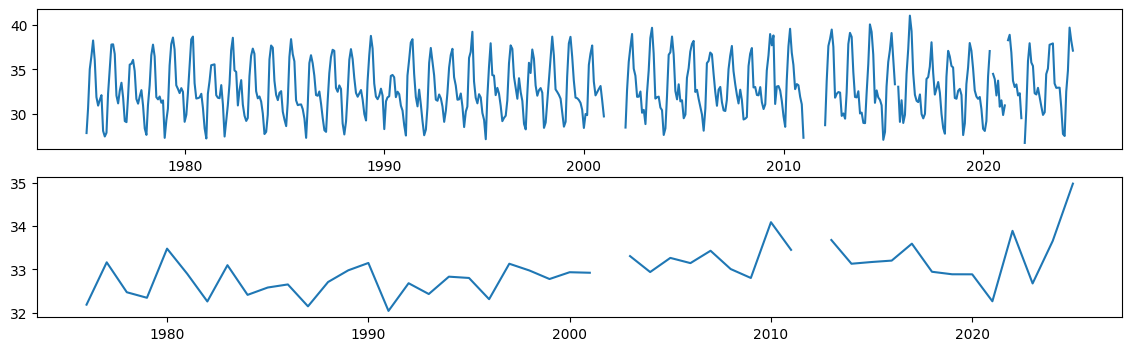

In [16]:
plt.rcParams['figure.figsize'] = [14, 4]
annual_temp = monthly_data.resample('A').mean()
fig, axes = plt.subplots(2,1)
axes[0].plot(monthly_data)
axes[1].plot(annual_temp)

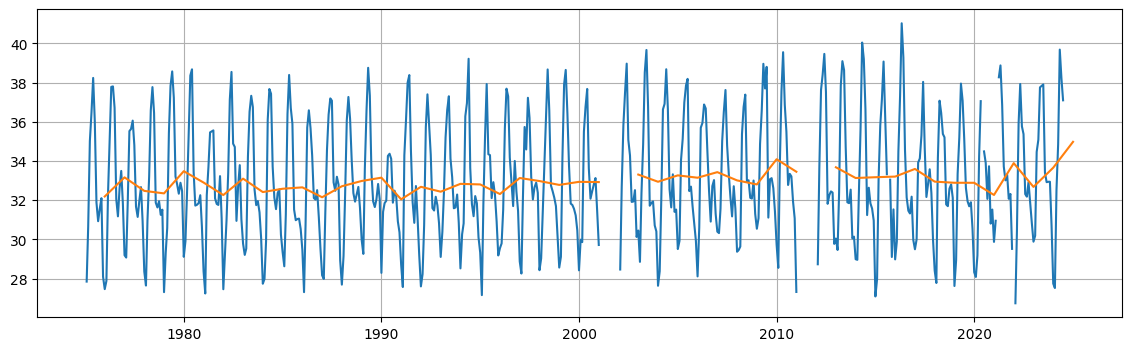

In [18]:
# plot both on same figure
plt.plot(monthly_data)
plt.plot(annual_temp)
plt.grid()

Take 10 year data 

In [32]:
f75_85 = monthly_data['1975-01-01':'1985-01-01']

In [20]:
f75_85.head(), f75_85.tail()

(                  MAX
 Date                 
 1975-01-31  27.845161
 1975-02-28  30.628571
 1975-03-31  35.016129
 1975-04-30  36.460000
 1975-05-31  38.235484,
                   MAX
 Date                 
 1984-08-31  31.541935
 1984-09-30  32.360000
 1984-10-31  32.548387
 1984-11-30  30.239286
 1984-12-31  29.348387)

In [21]:
chunks = np.split(f75_85.MAX, indices_or_sections=12)

C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [22]:
mean_vals = np.mean(chunks,axis=1)
var_vals = np.var(chunks,axis=1)
vals = {'mean_vals': mean_vals , 'var_vals': var_vals}
mean_var = pd.DataFrame(vals)
mean_var

,mean_vals,var_vals
0,33.068651,9.330364
1,32.638771,14.882818
2,33.005651,5.887656
3,31.513443,5.578351
4,31.962182,8.527605
5,34.184355,8.000437
6,33.574753,7.879947
7,32.263026,7.688068
8,32.775555,10.447436
9,32.239124,5.664133


In [23]:
import statsmodels.tsa.stattools as ts


In [24]:
def dftest(timeseries):
    dftest = ts.adfuller(timeseries,)
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.grid()
    plt.show(block=False)

Test Statistic           -2.698414
p-value                   0.074313
Lags Used                13.000000
Observations Used       106.000000
Critical Value (1%)      -3.493602
Critical Value (5%)      -2.889217
Critical Value (10%)     -2.581533
dtype: float64


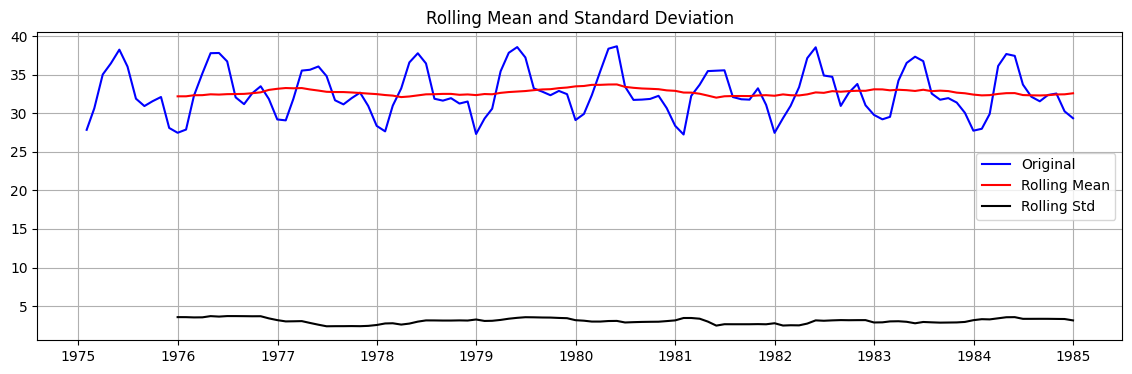

In [26]:
dftest(f75_85.MAX)


C:\Users\dsmat\AppData\Local\Temp\ipykernel_10804\3157899943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f75_85['lag_12'] = f75_85.shift(12)
C:\Users\dsmat\AppData\Local\Temp\ipykernel_10804\3157899943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f75_85['seasonal_diff'] = f75_85["MAX"] - f75_85['lag_12']


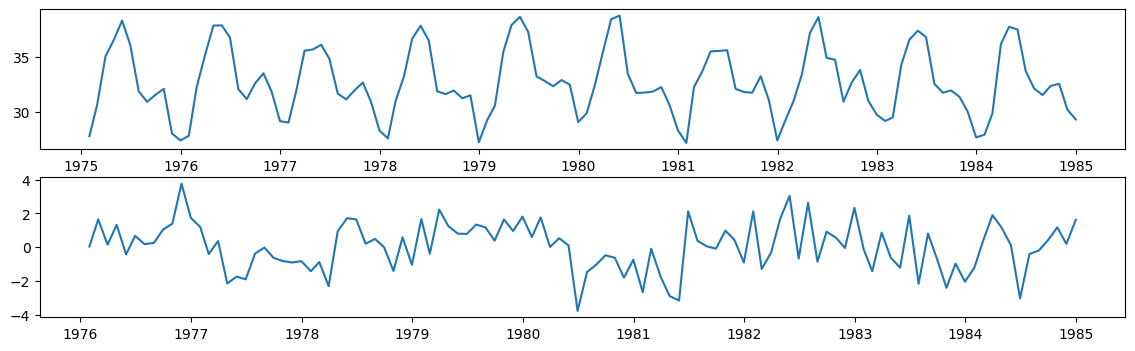

In [33]:
# Important to note that values have strong seasonality and adf test as well as rolling mean may not capture this.
# That is why it is always important to pay attention to run sequence plot
f75_85['lag_12'] = f75_85.shift(12)
f75_85['seasonal_diff'] = f75_85["MAX"] - f75_85['lag_12']

fig,axes = plt.subplots(2,1)
axes[0].plot(f75_85.MAX,label ='original')
axes[1].plot(f75_85.seasonal_diff,label = 'seasonal diff')

In [34]:
# define helper plot function for visualization
def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    raw.plot(data)
    sm.tsa.graphics.plot_acf(data, lags=lags, ax=acf, zero=False)
    sm.tsa.graphics.plot_pacf(data, lags=lags, ax=pacf, zero = False)
    sns.despine()
    plt.tight_layout()

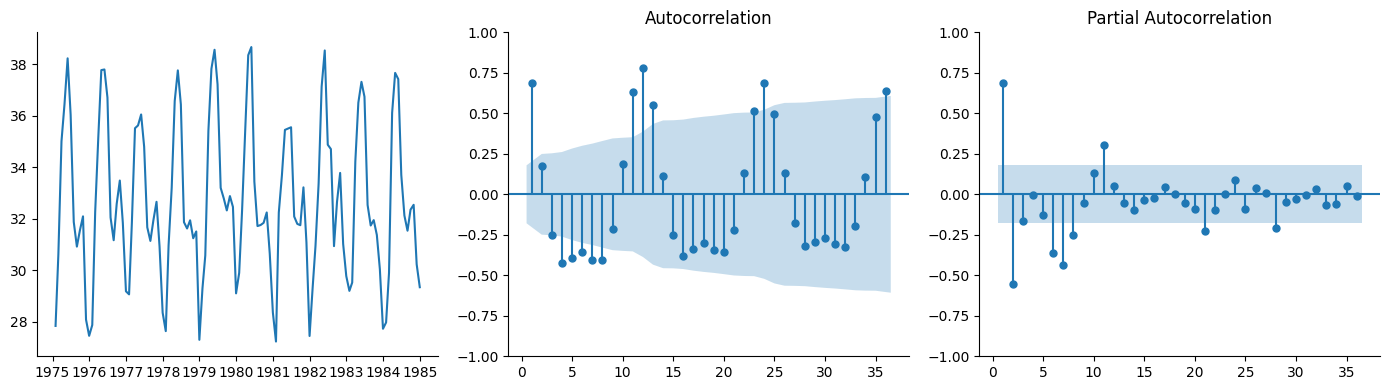

In [36]:
# helper plot for monthly temps
plots(f75_85.MAX, lags=36)
# open Duke guide for visual
# we note a 12-period cycle (yearly) with suspension bridge design, so must use SARIMA

In [38]:
# we might need to install dev version for statespace functionality
#!pip install git+https://github.com/statsmodels/statsmodels.git

# fit SARIMA monthly based on helper plots
sar = sm.tsa.statespace.SARIMAX(f75_85.MAX, 
                                order=(1,0,0), 
                                seasonal_order=(0,1,1,12), 
                                trend='c').fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  MAX   No. Observations:                  120
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -159.123
Date:                              Mon, 10 Mar 2025   AIC                            326.247
Time:                                      22:41:51   BIC                            336.975
Sample:                                  01-31-1975   HQIC                           330.597
                                       - 12-31-1984                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0048      0.029      0.169      0.866      -0.051       0.061
ar.L1          0.2347      0.099      2.363      0.018       0.040       0.429
ma.S.L12      -0.9980     13.034     -0.077      0.939     -26.543      24.547
sigma2         0.8646     11.210      0.077      0.939     -21.107      22.836
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 1.80
Prob(Q):                              0.69   Prob(JB):                         0.41
Heteroskedasticity (H):               1.46   Skew:                            -0.23
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

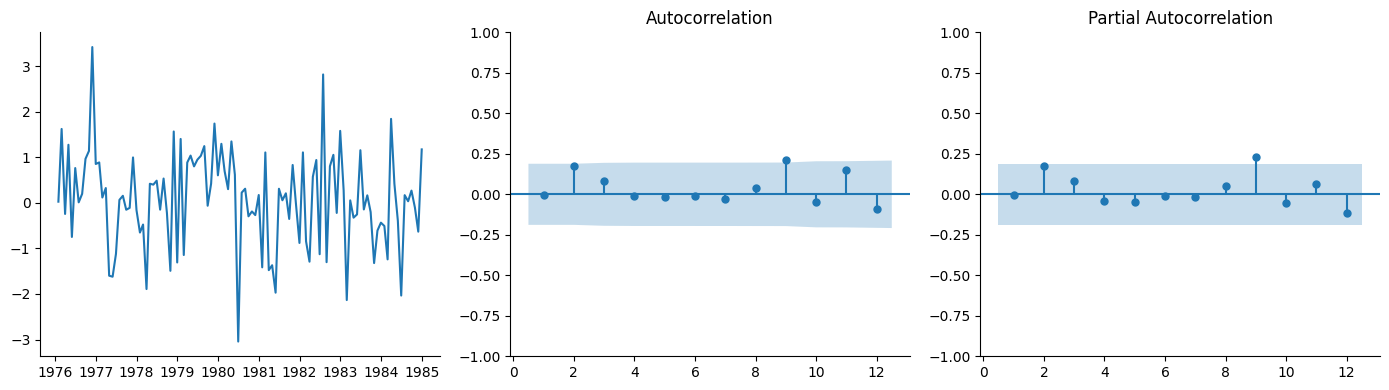

In [39]:
# plot resids
plots(sar.resid[sar.loglikelihood_burn:], lags=12);

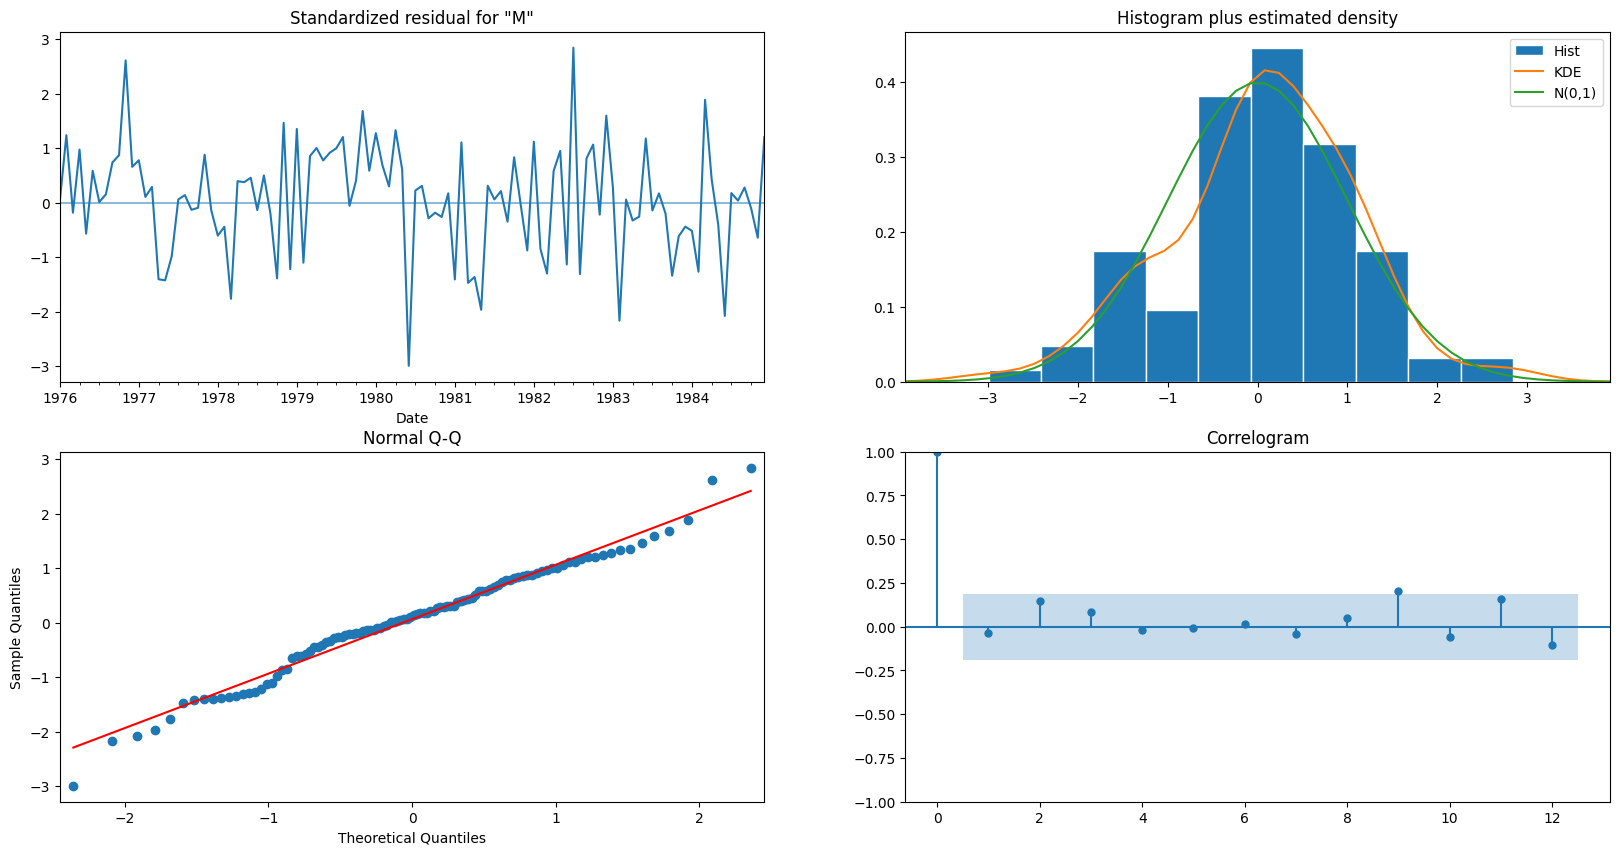

In [40]:
sar.plot_diagnostics(lags=12,figsize = (20,10),);

Date
1975-01-31     0.006301
1975-02-28     0.006313
1975-03-31     0.006317
1975-04-30     0.006320
1975-05-31     0.006321
                ...    
1984-08-31    31.504148
1984-09-30    32.088354
1984-10-31    32.651506
1984-11-30    30.869347
1984-12-31    28.171102
Freq: ME, Name: forecast, Length: 120, dtype: float64


C:\Users\dsmat\AppData\Local\Temp\ipykernel_10804\3928353043.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f75_85['forecast'] = sar.predict(start = 0, end=250)


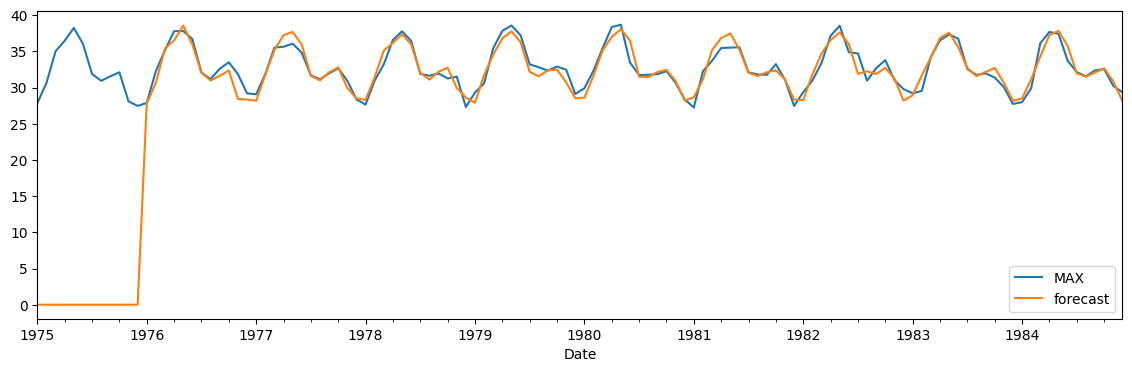

In [49]:
# plot predictions
pd.plotting.register_matplotlib_converters()
#use model.predict() start and end in relation to series
f75_85['forecast'] = sar.predict(start = 0, end=250)  
f75_85[0:][['MAX', 'forecast']].plot();
print(f75_85['forecast'])

In [50]:
#Introducing another model
sar2 = sm.tsa.statespace.SARIMAX(f75_85.MAX, 
                                order=(3,0,0), 
                                seasonal_order=(0,1,1,12), 
                                trend='c').fit()

C:\Users\dsmat\AppData\Local\Temp\ipykernel_10804\2163045869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f75_85['forecast'] = sar2.predict(start = 12, end= 120, dynamic=False)


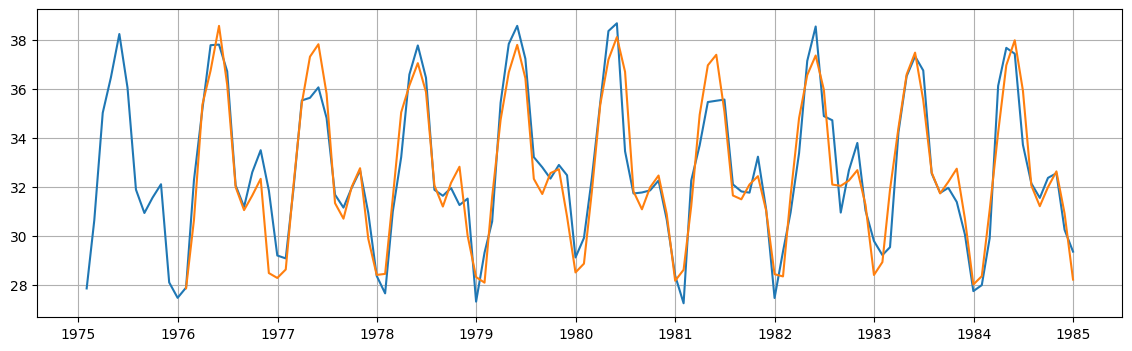

In [51]:
# plot predictions
f75_85['forecast'] = sar2.predict(start = 12, end= 120, dynamic=False)  
plt.plot(f75_85[0:][['MAX', 'forecast']])
plt.grid();

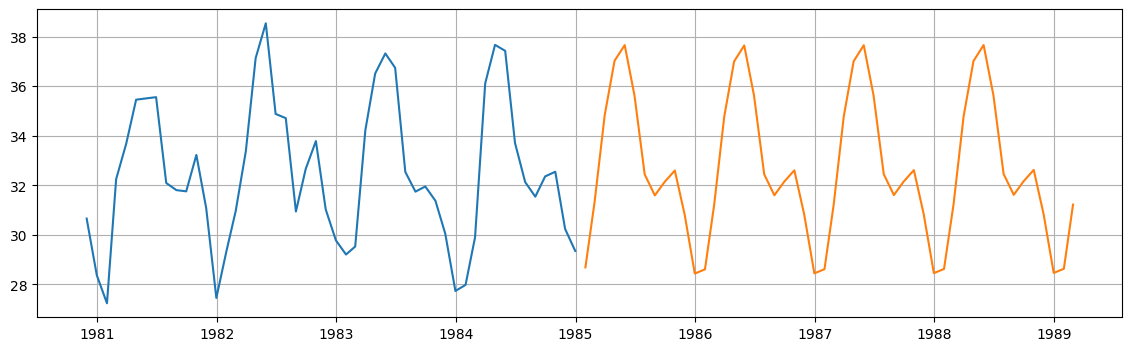

In [52]:
# can use get forecast to create a forecast object
future_fcst = sar2.get_forecast(50)
# That will have a method to pull in confidence interval 
confidence_int = future_fcst.conf_int(alpha = 0.01)
# Has an attribute to pull in predicted mean
fcst = future_fcst.predicted_mean
# Plot predictions and confidence intervals
plt.plot(f75_85.MAX[-50:])
plt.plot(fcst)
# plt.fill_between(confidence_int.index,confidence_int['lower temp'],confidence_int['upper temp'],alpha = 0.5)
plt.grid()